## Decision Tree and Random Forest

# Decision Tree (DT)

Think of it like a flowchart. It asks a series of yes/no questions about your data to make a decision or prediction.

The data below has different features, like **Temperature** and **Humidity**, that indicate whether my friend will join me for a football game.  
Each column represents a feature, and each row represents a day.

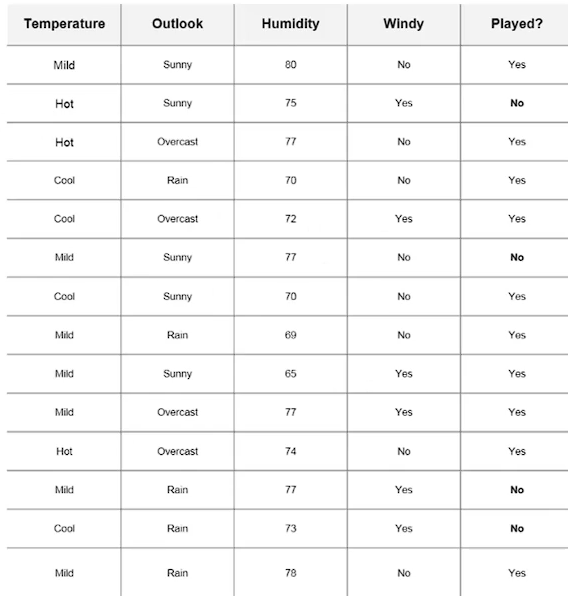


We can use this data to predict whether or not my friend will show up to play.  
A great way to do this is through a **Decision Tree**.

## Components of a Decision Tree

- **Nodes:** Points where the data is split based on the value of a certain attribute  
- **Edges:** The outcomes of a split that lead to the next node  
- **Root:** The first node that performs the initial split  
- **Leaves:** Terminal nodes that predict the outcome

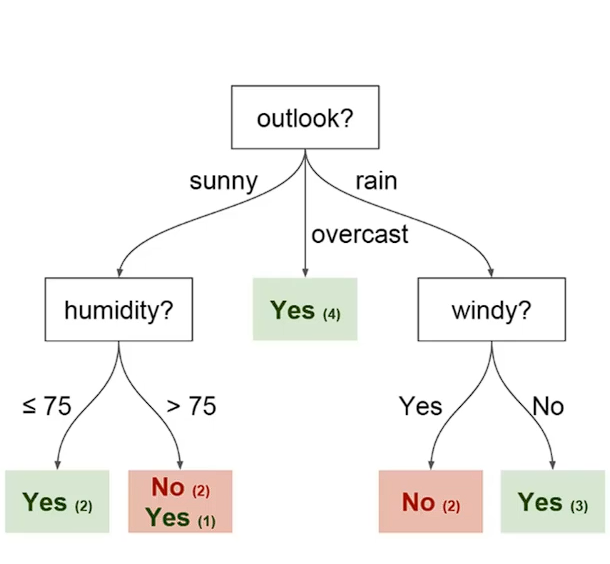


# Project Explanation

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here is what the columns represent:

- **credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.  
- **purpose:** The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").  
- **int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.  
- **installment:** The monthly installments owed by the borrower if the loan is funded.  
- **log.annual.inc:** The natural log of the self-reported annual income of the borrower.  
- **dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).  
- **fico:** The FICO credit score of the borrower.  
- **days.with.cr.line:** The number of days the borrower has had a credit line.  
- **revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).  
- **revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).  
- **inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.  
- **delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.  
- **pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).




In [ ]:
# Import piplite and install libraries for learning environment
import piplite
await piplite.install('seaborn')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# to make visualizations inside the notebook
%matplotlib inline

In [ ]:
#import Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('loan_data.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

## EDA = Exploratory Data Analysis

In [ ]:
plt.figure (figsize = (10,6))
df[df['credit.policy'] == 1]['fico'].hist(alpha = 0.5, color = 'blue', bins = 35, label = "credit policy = 1")
df[df['credit.policy'] == 0]['fico'].hist(alpha = 0.5, color = 'green', bins = 35, label = "credit policy = 0")
plt.legend()
plt.xlabel('FICO')
plt.show()

In [ ]:
plt.figure (figsize = (10,6))
df[df['not.fully.paid'] == 1]['fico'].hist(alpha = 0.5, color = 'blue', bins = 35, label = "not.fully.paid = 1")
df[df['not.fully.paid'] == 0]['fico'].hist(alpha = 0.3, color = 'green', bins = 35, label = "not.fully.paid = 0")
plt.legend()
plt.xlabel('FICO')
plt.show()

In [ ]:
sns.jointplot(data = df, x = 'fico', y = 'int.rate', color = 'purple')
plt.show()

In [ ]:
sns.lmplot(data = df, x = 'fico', y = 'int.rate', hue = 'credit.policy', col = 'not.fully.paid')
plt.savefig('fig.png')
plt.show()

In [ ]:
df

In [ ]:
final_data = pd.get_dummies(df, columns = ['purpose'], drop_first = True)
final_data

In [ ]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

In [ ]:
prediction = dtree.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,prediction))

In [ ]:
print(classification_report(y_test, prediction))

## RF

In [ ]:
rfc = RandomForestClassifier(n_estimators=50)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
prd = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,prd))
print(classification_report(y_test, prd))